# Calculating calibration densities and plotting models
- This workbook shows how we calculate densities for calibration data, plot models and calculate the cali lines

In [7]:
# Import useful python packages
import pandas as pd
import os
import DiadFit as pf
pf.__version__

'0.0.87'

## Plot of density vs fermi splitting

In [8]:
cornellpath=os.getcwd()+'/'+"1-s2.0-S0009254121004654-mmc1.xlsx"
cornellcell=pd.read_excel(cornellpath)
display(cornellcell.head())

,Date,time,Date group,Raw file name,Sample type,v- position (cm-1),v+ position (cm-1),∆CO2 (cm-1),Ne corrected ∆CO2 (cm-1),P(Median-MPa),...,WANG vs EOS,LAM vs EOS,Neon data,1122 peak position (cm-1),1453 peak position (cm-1),∆Ne-m (cm-1),∆Ne-r (cm-1),1122 r (cm-1),1453 r (cm-1),"Comments (power-mW, integrationxaccumulations, associated Ne)"
0,11/29/2020,1900-01-01 01:20:58,NOV_2020,POC58,FDCA,1286.7182,1389.4400,102.7218,102.7817,0.037,...,0.020605,0.047001,NaN,1123.4561,1453.7410,330.2849,330.477634,1122.776289,1453.253923,56.590X5NE77
1,11/29/2020,1900-01-01 01:10:45,NOV_2020,POC57,FDCA,1286.7205,1389.4383,102.7178,102.7844,0.040,...,0.021512,0.047899,NaN,1123.4697,1453.7333,330.2636,330.477634,1122.776289,1453.253923,56.590X5NE76
2,11/29/2020,1900-01-01 00:54:26,NOV_2020,POC55,FDCA,1286.7079,1389.4321,102.7242,102.7868,0.061,...,0.022023,0.048400,NaN,1123.4566,1453.7330,330.2764,330.477634,1122.776289,1453.253923,56.590X3NE74
3,11/29/2020,1900-01-01 00:46:57,NOV_2020,POC54,FDCA,1286.6881,1389.4193,102.7312,102.7939,0.070,...,0.024418,0.050759,NaN,1123.4597,1453.7359,330.2762,330.477634,1122.776289,1453.253923,56.590X3NE72
4,09/18/2020,9:58:56 PM,SEPT_2020,CUC31,FDCA,1286.0110,1388.7926,102.7816,102.8011,0.083,...,0.026791,0.053084,NaN,1122.6997,1453.1146,330.4149,330.477600,1122.776300,1453.253900,Ne41


## Fit the calibration lines 
- Separate sets by temperature

In [9]:
T37C=cali_data=cornellcell[cornellcell['T (ID)']==24]
Split_col='Ne corrected ∆CO2  (cm-1)'
CO2_dens_col='Density from EOS  (g/ml)'
split_error=0.01
CO2_dens_error=0.01


In [10]:
cornellcell['T (ID)'].unique()

array([37, 24], dtype=int64)

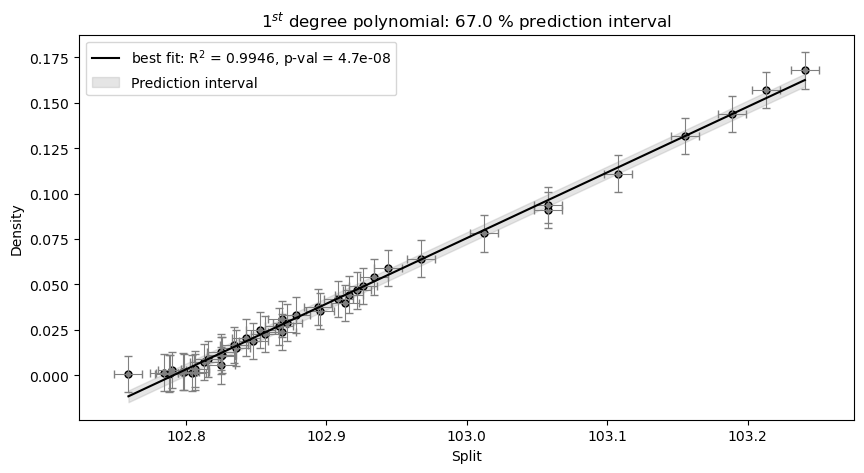

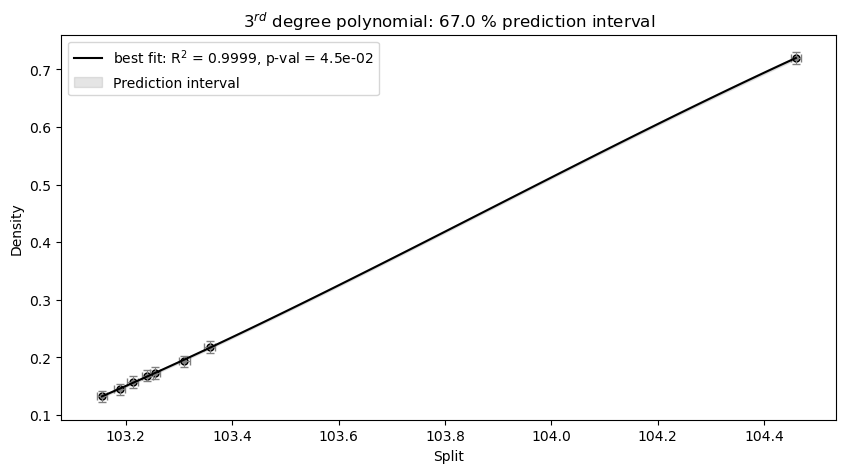

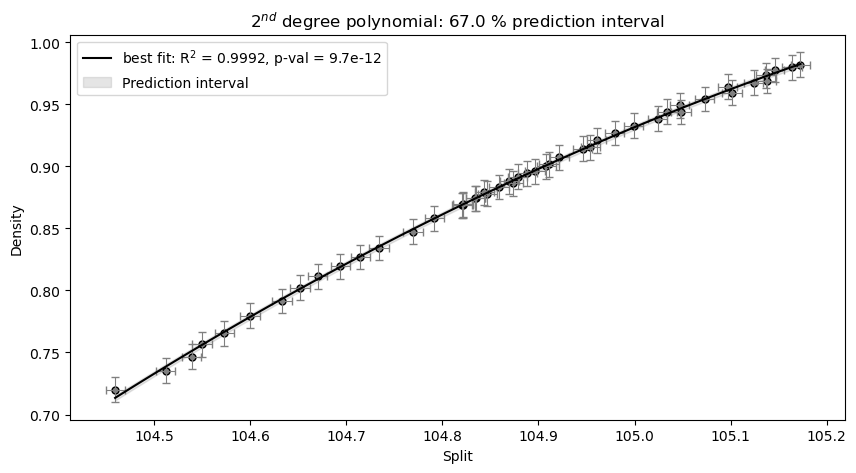

In [12]:
CI=0.67
df=T37C
eq_division='ccmr'
save_suffix='_CCMR_24C'

pf.plot_and_save_CO2cali_pickle(cali_data=df, Split_col=Split_col, CO2_dens_col=CO2_dens_col, split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='Low',N_poly=1, CI=CI, std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)
pf.plot_and_save_CO2cali_pickle(cali_data=df, Split_col=Split_col, CO2_dens_col=CO2_dens_col, split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='Medium',N_poly=3, CI=CI, std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)
pf.plot_and_save_CO2cali_pickle(cali_data=df, Split_col=Split_col, CO2_dens_col=CO2_dens_col, split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='High',N_poly=2, CI=CI, std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)